OASIS INFOBYTE DATASCIENCE INTERNSHIP

TASK 1

HARSH DHARIYA

IRIS FLOWER CLASSIFICATION


In [1]:
#import main 2 libraries
import numpy as np
import pandas as pd

In [2]:
data=pd.read_csv('Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data.shape

(150, 6)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
data['Species'].unique()


array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
#we don't need the 1st column so let's drop that
data=data.iloc[:,1:]

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [9]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
#check for null values
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [11]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

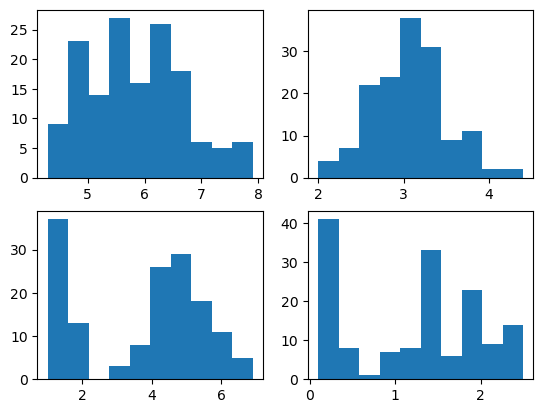

In [12]:
#histograms
plt.subplot(2,2,1)
plt.hist(data['SepalLengthCm'])
plt.subplot(2,2,2)
plt.hist(data['SepalWidthCm'])
plt.subplot(2,2,3)
plt.hist(data['PetalLengthCm'])
plt.subplot(2,2,4)
plt.hist(data['PetalWidthCm'])
plt.show

In [13]:
#scatter plots
colors=['red','yellow','green']
species=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

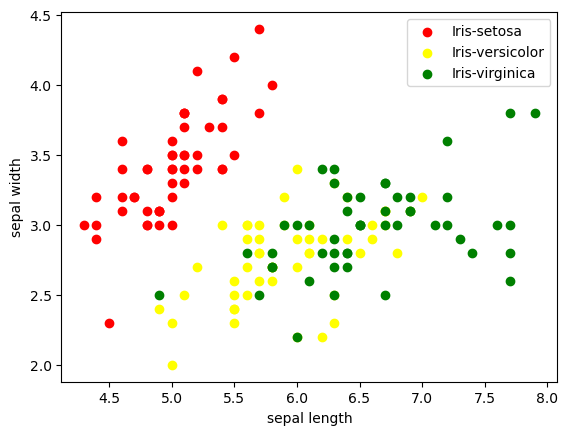

In [14]:
for i in range(3):
    x=data[data['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['SepalWidthCm'], c=colors[i], label=species[i])
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

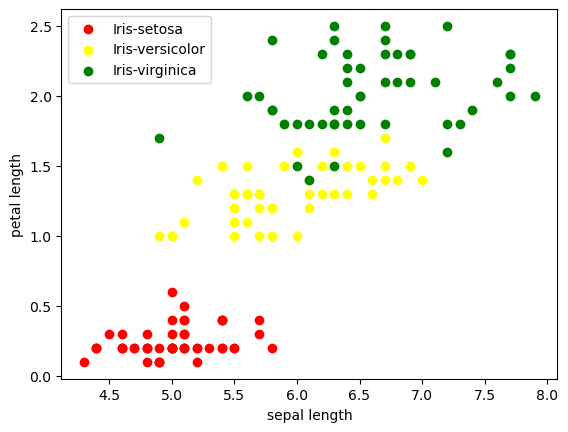

In [15]:
for i in range(3):
    x=data[data['Species']==species[i]]
    plt.scatter(x['SepalLengthCm'],x['PetalWidthCm'], c=colors[i], label=species[i])
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend()

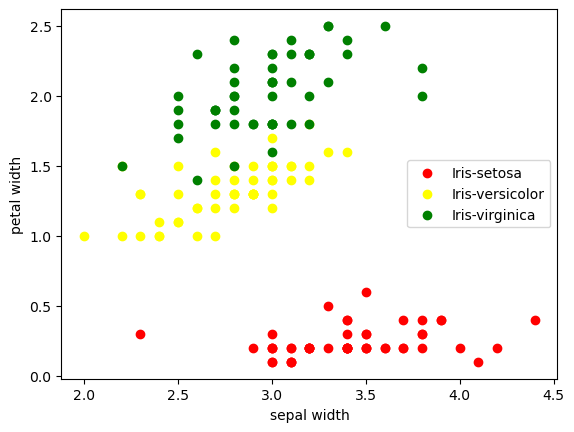

In [16]:
for i in range(3):
    x=data[data['Species']==species[i]]
    plt.scatter(x['SepalWidthCm'],x['PetalWidthCm'], c=colors[i], label=species[i])
plt.xlabel('sepal width')
plt.ylabel('petal width')
plt.legend()

In [17]:
#corealation matrix to check inter depandability of columns
data.corr()

C:\Users\harsh\AppData\Local\Temp\ipykernel_16980\3021111799.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [18]:
# as the output is a classification of strings we need to import label encoder to make that numeric
from sklearn.preprocessing import LabelEncoder

In [19]:
le= LabelEncoder()

In [20]:
data['Species']= le.fit_transform(data['Species'])

In [21]:
data['Species'].unique()

array([0, 1, 2])

In [22]:
x=data.drop(columns=['Species'])
y=data['Species']

In [23]:
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Species, dtype: int32

In [25]:
# train test split  70% in train
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.3)

In [27]:
x_train.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
134,6.1,2.6,5.6,1.4
36,5.5,3.5,1.3,0.2
147,6.5,3.0,5.2,2.0
89,5.5,2.5,4.0,1.3
30,4.8,3.1,1.6,0.2


In [28]:
y_test.head()

99     1
122    2
38     0
59     1
19     0
Name: Species, dtype: int32

In [29]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [30]:
column_trans=make_column_transformer((OneHotEncoder(sparse=False),[]),remainder='passthrough')

In [31]:
scaler=StandardScaler()

In [32]:
# KNN(k nearest neighbors) algorithm
from sklearn.neighbors import KNeighborsClassifier

In [33]:
knn= KNeighborsClassifier()

In [34]:
pipe = make_pipeline(column_trans,scaler,knn)

In [35]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [])])),
                ('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [36]:
y_pred_knn= pipe.predict(x_test)

In [37]:
r2_score(y_test,y_pred_knn)

0.9305555555555556

In [38]:
#logistic regression algorithm
from sklearn.linear_model import LogisticRegression

In [39]:
lr= LogisticRegression()

In [40]:
pipe=make_pipeline(column_trans,scaler,lr)

In [41]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  [])])),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [42]:
y_pred_lr=pipe.predict(x_test)

In [43]:
r2_score(y_test,y_pred_lr)

0.9652777777777778

In [44]:
#testing the pipe is predicting or not
pipe.predict([[1.2,1.5,1.6,1.2]])

array([0])

In [45]:
import pickle

In [46]:
pickle.dump(pipe,open('iris_flower.pkl','wb'))